In [1]:
include("datain.jl")

calender_value (generic function with 2 methods)

In [2]:
include("Figure1-julia07.jl")

gain (generic function with 1 method)

In [3]:
pyplot() # any backend is fine though

┌ Warning: The start/next/done iteration protocol is deprecated. Implement `iterate(::PyCall.PyDict{PyCall.PyAny,PyCall.PyAny,true})`.
│   caller = ip:0x0
└ @ Core :-1


Plots.PyPlotBackend()

In [4]:
md = MonthlyData([1959 1], [2014 12], 148)
qd = QuarterlyData([1959 1], [2014 4], 85)

QuarterlyData(224, 85)

In [5]:
dataset = readin_data(md, qd, BiWeight(100), RealData())

(bpdata_raw = Union{Missing, Float64}[2976.63 1809.4 … 69.9 253.207; 3049.01 1837.3 … 67.0 260.367; … ; 16205.6 10999.5 … 61.7667 1654.21; 16293.7 11113.6 … 60.9667 missing], bpcatcode = Any[1.01, 1.02, 1.021, 1.022, 1.023, 1.05, 1.051, 1.052, 1.053, 1.054  …  5.1, 5.11, 5.2, 5.21, 5.22, 5.23, 5.3, 5.31, 5.32, 5.4], bpdata = Union{Missing, Float64}[missing missing … 12.3235 missing; 0.0142268 0.00530395 … 9.45272 0.0152701; … ; 0.00687755 0.00197529 … 6.72325 0.00391343; 0.000212054 0.00439543 … 5.91928 missing], bpdata_unfiltered = Union{Missing, Float64}[missing missing … 69.9 missing; 0.0240258 0.0153018 … 67.0 0.0278849; … ; 0.0121175 0.00793173 … 61.7667 0.00887936; 0.00542382 0.0103198 … 60.9667 missing], bpdata_noa = Union{Missing, Float64}[missing missing … 69.9 missing; 0.0240258 0.0153018 … 67.0 0.0278849; … ; 0.0121175 0.00793173 … 61.7667 0.00887936; 0.00542382 0.0103198 … 60.9667 missing], bpdata_trend = Union{Missing, Float64}[missing missing … 57.5765 missing; 0.00979898

In [6]:
year = dataset.calvec
data2 = dataset.bpdata
inclcode2 = dataset.inclcode'

1×86 Adjoint{Int64,Array{Int64,1}}:
 2  2  1  1  1  2  2  1  1  1  1  2  1  …  1  2  2  1  1  1  1  1  1  1  1  1

In [11]:
nt_min_factor_estimation = 20 # min number of obs for any series used to est factors
nt_min_factorloading_estimation = 40 # min number of obs for any series used to estimate lamba, irfs, etc.
initperiod = 3 # first two observations are dropped
lastperiod = 224
nfac_o = 0 # number of observed factors
nfac_u = 1 # number of unobserved factors
n_uarlag = 4 # number of AR lags for uniqueness
n_factorlag = 4 # number of lags for factor evolution VAR
tol = 1e-8

1.0e-8

In [12]:
dfmm = DFMModel(data2, inclcode2,
                nt_min_factor_estimation, nt_min_factorloading_estimation,
                initperiod, lastperiod, nfac_o, nfac_u, tol, n_uarlag, n_factorlag)


DFMModel(Union{Missing, Float64}[missing missing … 12.3235 missing; 0.0142268 0.00530395 … 9.45272 0.0152701; … ; 0.00687755 0.00197529 … 6.72325 0.00391343; 0.000212054 0.00439543 … 5.91928 missing], [2 2 … 1 1], 224, 20, 40, 3, 224, 0, 1, 1, 1.0e-8, Union{Missing, Float64}[missing; missing; … ; missing; missing], [0.0; 0.0; … ; 0.0; 0.0], [0.0 5.90909e-316 3.55233e-321 0.0; 1.72351e-314 4.94066e-324 4.94066e-324 0.0; … ; 0.0 5.90909e-316 5.90374e-316 5.56487e-316; 1.72351e-314 4.94066e-324 6.27912e-316 6.9495e-310], [6.94944e-310, 6.94949e-310, 6.94944e-310, 6.94944e-310, 6.94949e-310, 6.94944e-310, 6.94944e-310, 6.94944e-310, 6.94944e-310, 6.94944e-310  …  6.94944e-310, 6.94944e-310, 6.94944e-310, 6.94944e-310, 6.94944e-310, 6.94948e-310, 6.94944e-310, 6.94944e-310, 6.94944e-310, 0.0], 4, 4, VARModel{Array{Union{Missing, Float64},2},Array{Union{Missing, Float64},2},Array{Union{Missing, Float64},2}}(Union{Missing, Float64}[missing; missing; … ; missing; missing], 4, true, 3, 224, 224

In [13]:
estimate!(dfmm, NonParametric())

diff = 7804.76838016794
diff = 0.4816271660720304
diff = 0.002723053865338443
diff = 4.320087100495584e-5


In [14]:
function plot_skipmissing!(p, x, y; args...)
    x[ismissing.(x)] .= NaN
    y[ismissing.(y)] .= NaN
    plot!(p, x, y; args...)
    return nothing
end
function plot_skipmissing(x, y; args...)
    p = plot()
    plot_skipmissing!(p, x, y; args...)
    return p
end

plot_skipmissing (generic function with 1 method)

In [15]:
function compare_series!(p, dfmm::DFMModel, namevec,
                          name, lab)
    i = findall(dataset.bpnamevec.==name)[1]
    yf = compute_series(dfmm, i)
    y4f = detrended_year_growth(yf)
    y4 = detrended_year_growth(dfmm.data[:, i])
    plot_skipmissing!(p, year, [100*y4 100*y4f], lw=2,
        lab=[lab "Common Component"], leg=:bottomleft)
    return p
end

compare_series! (generic function with 1 method)

┌ Warning: `findfirst(A, v)` is deprecated, use `something(findfirst(isequal(v), A), 0)` instead.
│   caller = #plot!#141(::Base.Iterators.Pairs{Symbol,Any,Tuple{Symbol,Symbol,Symbol},NamedTuple{(:lw, :lab, :leg),Tuple{Int64,Array{String,2},Symbol}}}, ::Function, ::Plots.Subplot{Plots.PyPlotBackend}, ::Array{Float64,1}, ::Vararg{Any,N} where N) at plot.jl:290
└ @ Plots /home/holly/.julia/packages/Plots/PECeN/src/plot.jl:290


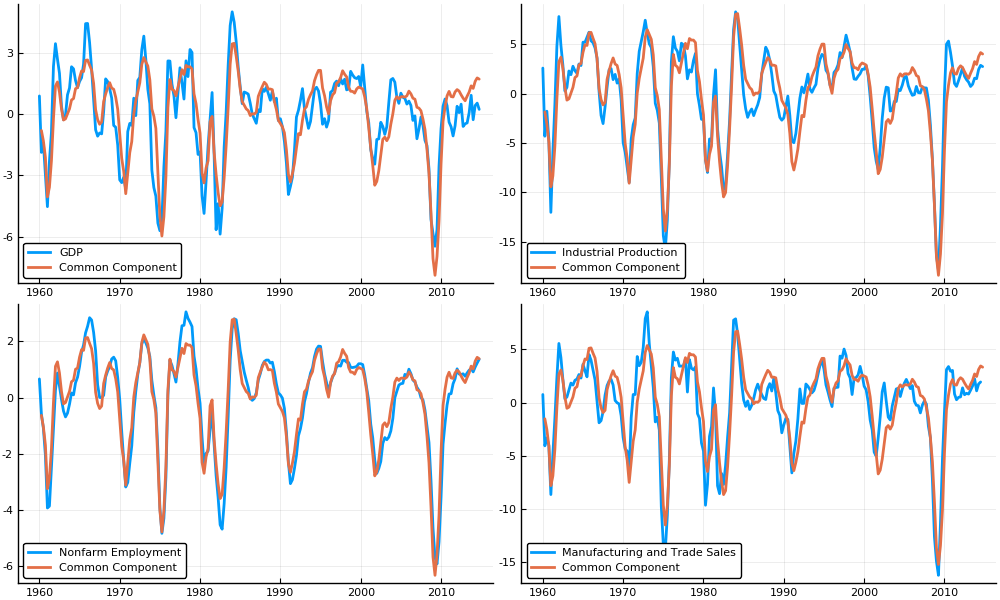

In [16]:
namevec = ["GDPC96","INDPRO","PAYEMS","A0M057"]
labvec = ["GDP", "Industrial Production",
            "Nonfarm Employment","Manufacturing and Trade Sales"]
p = plot(layout=(2,2), size=(1000,600))

for i in 1:4
    name, lab = namevec[i], labvec[i]
    compare_series!(p[i], dfmm, dataset.bpnamevec, name, lab)
end

p

# Figure 4

In [17]:
nfs = [1, 3, 5]
dfmms = [DFMModel(data2, inclcode2,
            nt_min_factor_estimation, nt_min_factorloading_estimation,
            initperiod, lastperiod, nfac_o, nf, tol, n_uarlag, n_factorlag)
         for nf in nfs]
estimate!.(dfmms)

diff = 7804.76838016794
diff = 0.4816271660720304
diff = 0.002723053865338443
diff = 4.320087100495584e-5
diff = 5947.432416588937
diff = 8.930805275637795
diff = 1.8708996323803149
diff = 0.6348330223863741
diff = 0.240938758840457
diff = 0.09535780838268693
diff = 0.03867088310926192
diff = 0.015993682378393714
diff = 0.006741672923453734
diff = 0.0028984755581404897
diff = 0.0012723608733722358
diff = 0.0005707054606318707
diff = 0.00026158627406402957
diff = 0.00012243854507687502
diff = 5172.6149443491295
diff = 12.431637784799932
diff = 3.9243245671432305
diff = 1.987211022747033
diff = 1.1735552838745207
diff = 0.7582870558771901
diff = 0.5212322627867252
diff = 0.3745513540052343
diff = 0.2781565558161674
diff = 0.211899883541264
diff = 0.1647928742613658
diff = 0.13040772571366688
diff = 0.10476265767738369
diff = 0.08527869200588611
diff = 0.07022832249003841
diff = 0.05842470573952596
diff = 0.04903628548800043
diff = 0.04147104274943558
diff = 0.03530161733397108
diff = 0.0

3-element Array{Nothing,1}:
 nothing
 nothing
 nothing

In [18]:
i = findall(dataset.bpnamevec.=="GDPC96")[1]
yfs = compute_series.(dfmms, i)
y4fs = detrended_year_growth.(yfs)
y4 = detrended_year_growth(dfmm.data[:, i]);

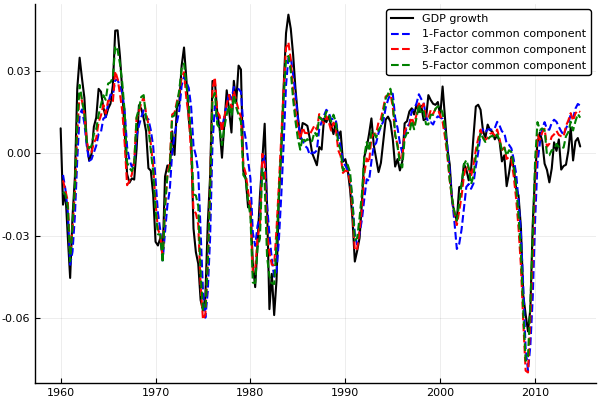

In [19]:
plot_skipmissing(year, hcat(y4, y4fs...), lw=1.5,
                lab=hcat("GDP growth", "1-Factor common component",
                        "3-Factor common component",
                        "5-Factor common component"),
                lc=[:black :blue :red :green],
                ls=[:solid :dash :dash :dash])

In [20]:
r2s = []
for i=1:length(nfs)
    tmp = ols_skipmissing(y4, [ones(length(y4)) y4fs[i]], Balanced())
    global r2s = vcat(r2s, compute_r2(y4[tmp[3]], tmp[2]))
end

┌ Warning: Deprecated syntax `implicit assignment to global variable `i``.
│ Use `global i` instead.
└ @ nothing none:0
┌ Warning: Loop variable `i` overwrites a variable in an enclosing scope. In the future the variable will be local to the loop instead.
└ @ nothing none:0


In [21]:
# bar(nfs, r2s)

# Figure 2

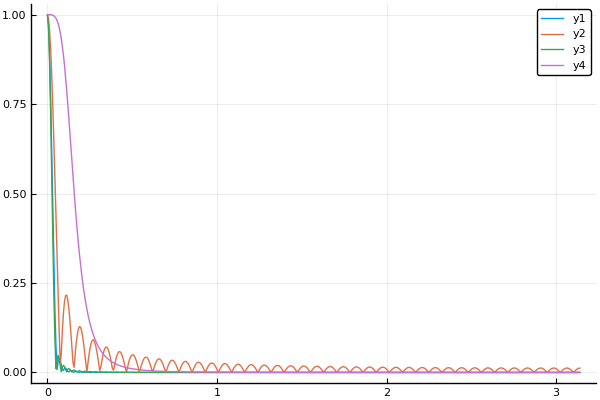

In [22]:
# Frequencies
wvec = range(0, stop=pi, length=500)
bw_para = 100
bw_weight, trend = compute_bw_weight(bw_para)
# Compute Gain
bw_gain = [Real(gain(bw_weight, wvec[i])) for i in 1:length(wvec)]

# Flat over + and - 40 quarters
ma40_weight = (abs.(trend) .<= 40)
ma40_weight = ma40_weight./sum(ma40_weight)
# Compute Gain
ma40_gain = [Real(gain(ma40_weight, wvec[i])) for i = 1:size(wvec,1)]

# Band pass, 100 terms on each side, 200 quarter cutoff;
nper = 200
ombar = 2pi/nper
t1 = 1:100
tmp0 = ombar/pi
tmp1 = (1 ./ (pi*t1)).*sin.(t1*ombar)
bp_weight = vcat(tmp1[end:-1:1], tmp0, tmp1)
bp_weight = bp_weight/sum(bp_weight)
# Compute Gain
bp_gain = [Real(gain(bp_weight, wvec[i])) for i =1:length(wvec)]
# HP
hp_weight = vec(readdlm("data/hpfilter_trend.asc"))

# Compute Gain
hp_gain = [Real(gain(hp_weight, wvec[i])) for i = 1:length(wvec)]

plot(trend, [bw_weight ma40_weight bp_weight hp_weight])
plot(wvec, [bw_gain ma40_gain bp_gain hp_gain])